In [1]:
# Importing essential packages 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.preprocessing import StandardScaler # StandardScaler class which is for Standardization

In [2]:
#Data Loading

data = 'C:\\Users\\zahl\\Desktop\\ML-Assignment\\Dataset\\maternal+health+risk\\Maternal Health Risk Data Set.csv'

df = pd.read_csv(data)

Exploratory Data Analysis

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


There are 7 columns and 1014 rows in the dataset. There are no null values and all features are either float or integer except for RiskLevel. RiskLevel is our target feature which is categorical.

In [5]:
#count the value of each target features
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [6]:
#get the shape of the dataset
df.shape

(1014, 7)

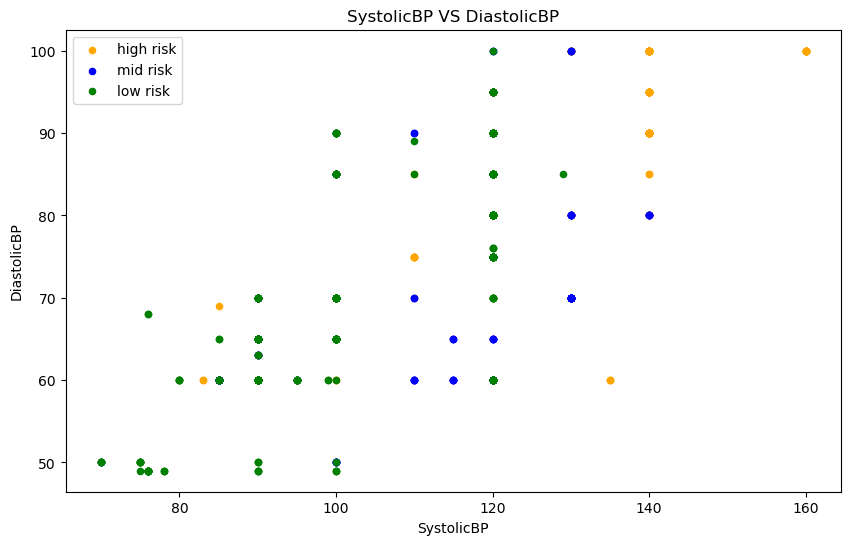

In [7]:
#Plotting Systolic Blood Pressure VS Diastolic Blood Pressure
fig = df[df.RiskLevel=='high risk'].plot(kind='scatter',x='SystolicBP',y='DiastolicBP',color='orange', label='high risk')
df[df.RiskLevel=='mid risk'].plot(kind='scatter',x='SystolicBP',y='DiastolicBP',color='blue', label='mid risk',ax=fig)
df[df.RiskLevel=='low risk'].plot(kind='scatter',x='SystolicBP',y='DiastolicBP',color='green', label='low risk', ax=fig)
fig.set_xlabel("SystolicBP")
fig.set_ylabel("DiastolicBP")
fig.set_title("SystolicBP VS DiastolicBP")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

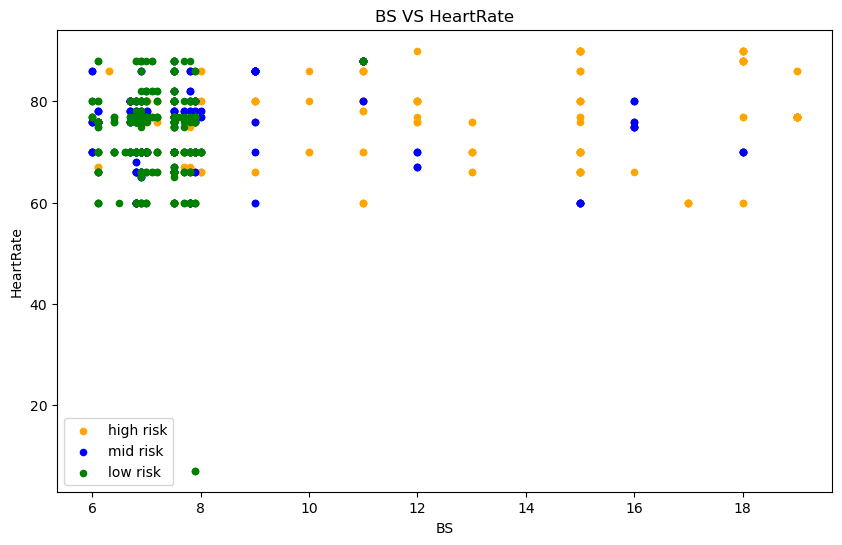

In [8]:
#Plotting Systolic Blood Sugar Level VS Heart Rate
fig = df[df.RiskLevel=='high risk'].plot(kind='scatter',x='BS',y='HeartRate',color='orange', label='high risk')
df[df.RiskLevel=='mid risk'].plot(kind='scatter',x='BS',y='HeartRate',color='blue', label='mid risk',ax=fig)
df[df.RiskLevel=='low risk'].plot(kind='scatter',x='BS',y='HeartRate',color='green', label='low risk', ax=fig)
fig.set_xlabel("BS")
fig.set_ylabel("HeartRate")
fig.set_title("BS VS HeartRate")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

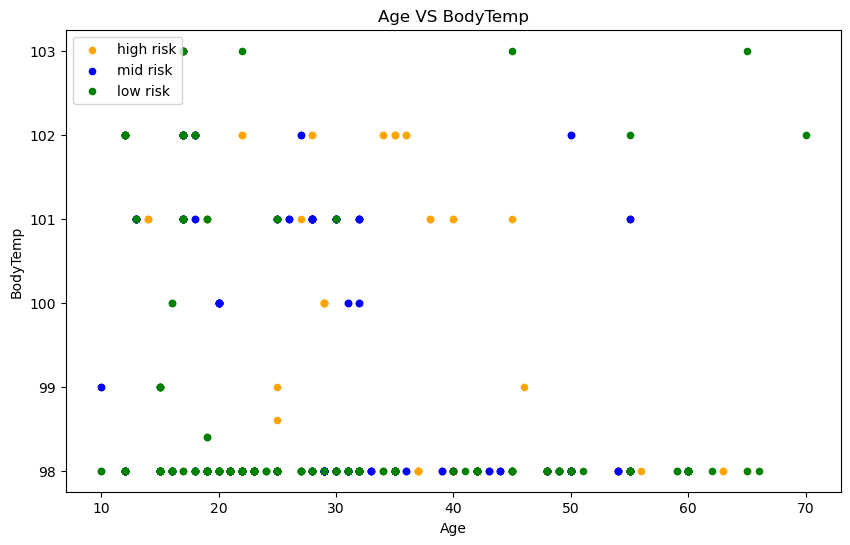

In [9]:
#Plotting Systolic Age VS Body Temperature
fig = df[df.RiskLevel=='high risk'].plot(kind='scatter',x='Age',y='BodyTemp',color='orange', label='high risk')
df[df.RiskLevel=='mid risk'].plot(kind='scatter',x='Age',y='BodyTemp',color='blue', label='mid risk',ax=fig)
df[df.RiskLevel=='low risk'].plot(kind='scatter',x='Age',y='BodyTemp',color='green', label='low risk', ax=fig)
fig.set_xlabel("Age")
fig.set_ylabel("BodyTemp")
fig.set_title("Age VS BodyTemp")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

We can see that while SystolicBP vs DiastolicBP have scattered datapoint, Blood Sugar Vs Heart Rate plot shows that the heart rate is between 60 to 85 for lowered blood sugar level and major of this segment have lower risks. The Age Vs Body Temperature also shows a generic scattered data points.

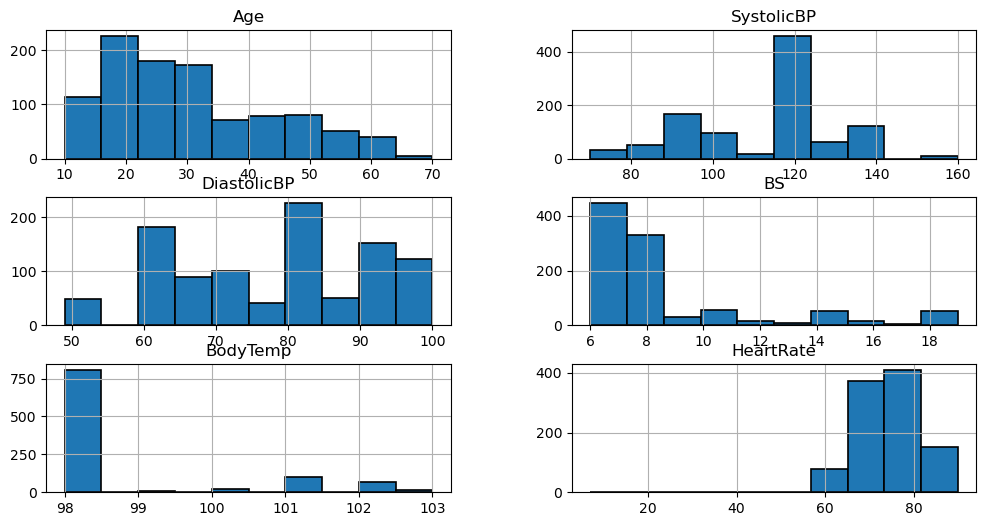

In [10]:
#Plotting histogram
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

We can see that majority of the subjects are between around 18 to 34 years of age and around half of subject have higher Systolic Blood Pressure.

<Axes: xlabel='RiskLevel', ylabel='BS'>

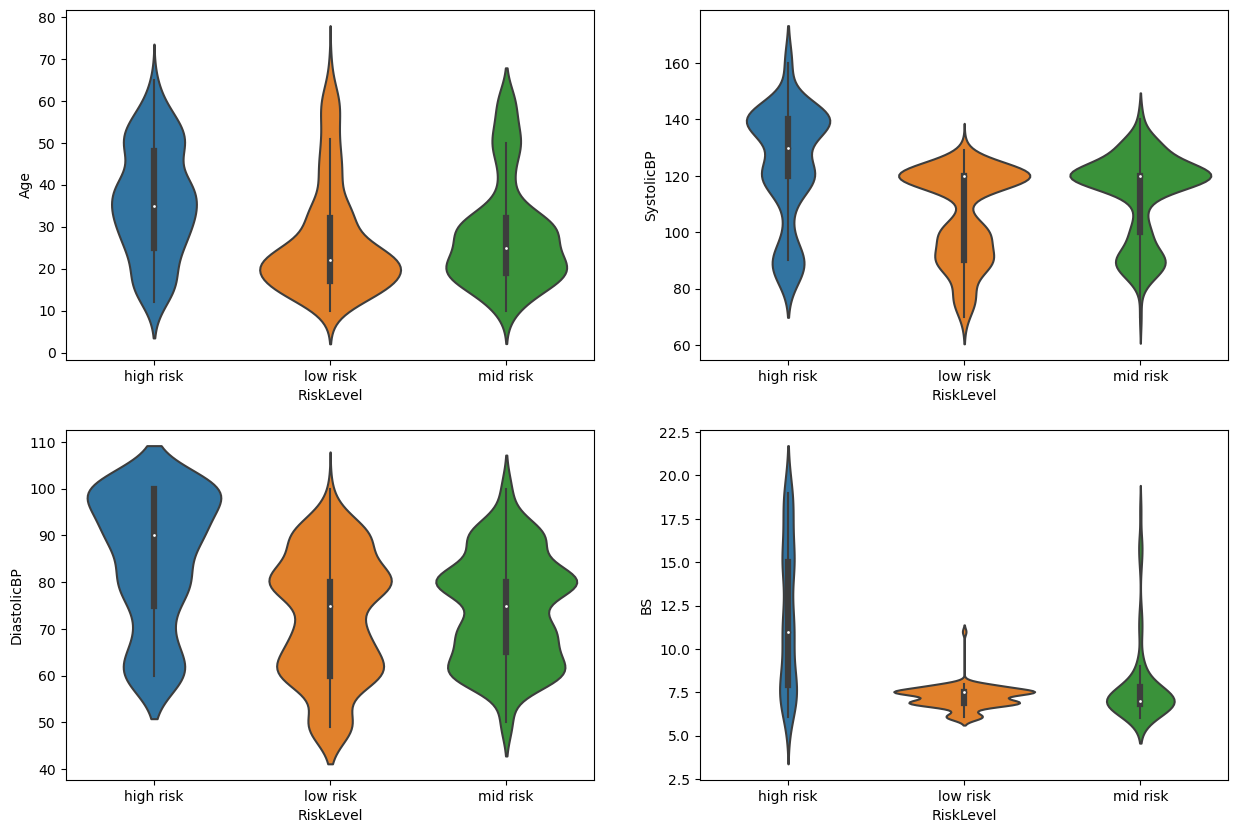

In [11]:
#Violin Plots
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='RiskLevel',y='Age',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='RiskLevel',y='SystolicBP',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='RiskLevel',y='DiastolicBP',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='RiskLevel',y='BS',data=df)

<Axes: xlabel='RiskLevel', ylabel='HeartRate'>

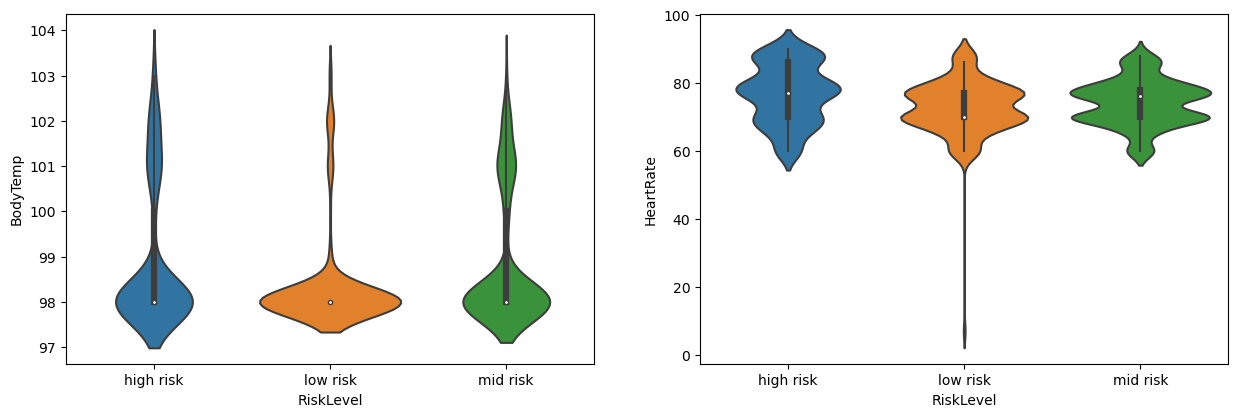

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='RiskLevel',y='BodyTemp',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='RiskLevel',y='HeartRate',data=df)

We can see that major of the subjects are of age between 30 to 40 and have higher Systolic Blood Pressure and Diastolic Blood Pressure.

In [13]:
# We need to encode the RiskLevel to check the corelation among the attributes.
df['RiskLevel']=df['RiskLevel'].astype('category').cat.codes

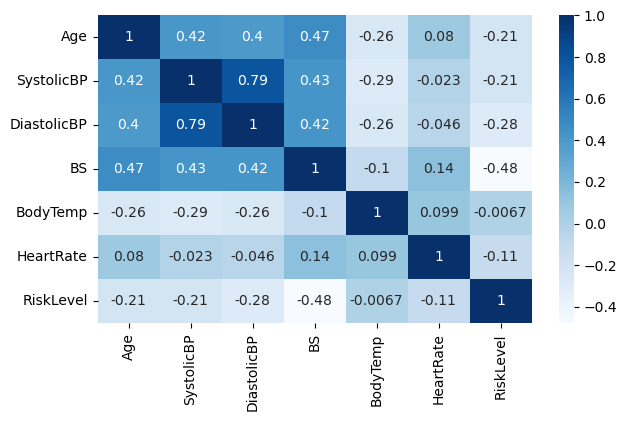

In [14]:
#Correlation Heatmap

plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='Blues') #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

We can see that the attributes don't seem to be hight correlated. Systolic and Diastolic Blood Pressure are correlated to each other. We can use this to create tests based on blood pressures only.

Now, let's run machine learning algorithms for classification on this dataset.

In [15]:
#Data Splitting
train, test = train_test_split(df, test_size = 0.30, random_state=47)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30% with 47 as random state
print(train.shape)
print(test.shape)

(709, 7)
(305, 7)


In [16]:
train_X = train[['Age','SystolicBP','DiastolicBP','BS', 'BodyTemp', 'HeartRate']]# taking the training data features
train_y=train.RiskLevel# output of our training data
test_X= test[['Age','SystolicBP','DiastolicBP','BS', 'BodyTemp', 'HeartRate']] # taking test data features
test_y =test.RiskLevel   #output value of test data

In [17]:
train_X.head(2)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
120,48,120,80,11.0,98.0,88
471,42,140,100,18.0,98.0,90


In [18]:
test_X.head(2)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
689,40,160,100,19.0,98.0,77
937,22,120,90,7.5,98.0,82


In [19]:
train_y.head()

120     0
471     0
310     1
1011    0
509     1
Name: RiskLevel, dtype: int8

In [20]:
test_y.head()

689    0
937    1
592    2
25     1
818    2
Name: RiskLevel, dtype: int8

Trying Support Vector Machine and getting it's accuracy.

The accuracy of the SVM is: 0.5737704918032787


<Axes: >

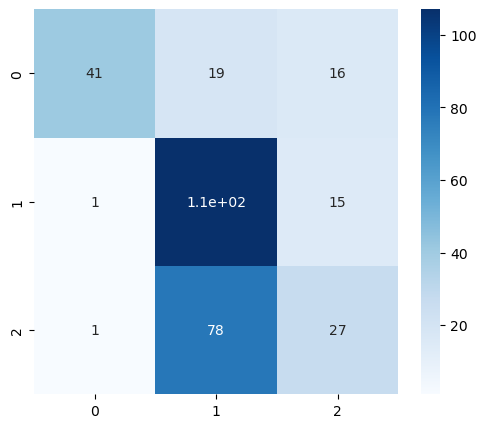

In [21]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

#we create a confusion matrics as well
confusion_matrix_svm=metrics.confusion_matrix(test_y,prediction)
confusion_matrix_svm

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_svm, annot=True, cmap="Blues")

Let's implement Logistic Regression and see it's performance

The accuracy of the Logistic Regression is 0.5672131147540984


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

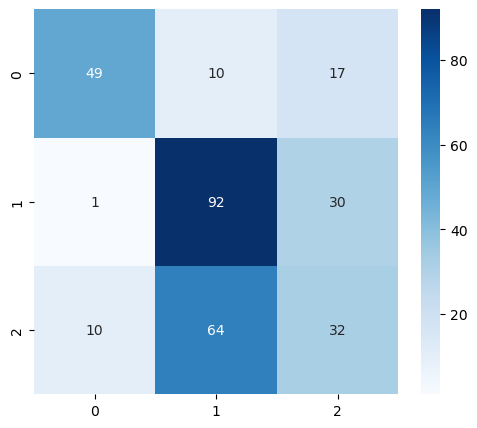

In [22]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

#confusion matrix
confusion_matrix_lr=metrics.confusion_matrix(test_y,prediction)
confusion_matrix_lr

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_lr, annot=True, cmap="Blues")

Now, we'll implement Decision Tree

The accuracy of the Decision Tree is 0.8163934426229508


<Axes: >

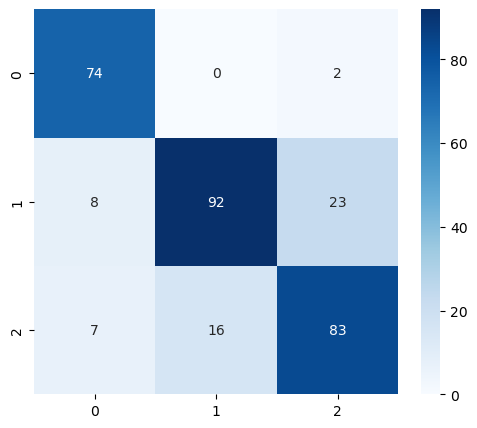

In [23]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

#Confusion matrix
confusion_matrix_dt=metrics.confusion_matrix(test_y,prediction)
confusion_matrix_dt

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_dt, annot=True, cmap="Blues")

Let's implement K-Nearest Neighbor

The accuracy of the KNN is 0.6852459016393443


<Axes: >

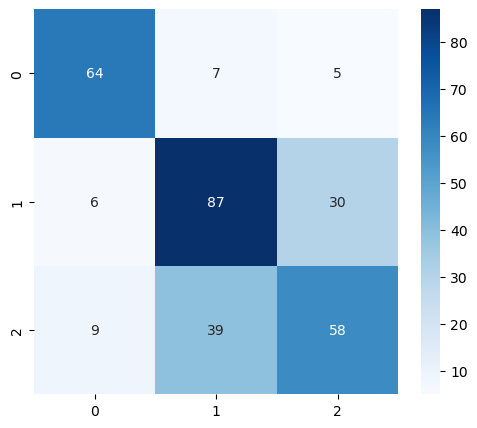

In [24]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

#Confusion matrix
confusion_matrix_knn=metrics.confusion_matrix(test_y,prediction)
confusion_matrix_knn

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_knn, annot=True, cmap="Blues")

C:\Users\zahl\AppData\Local\Temp\ipykernel_6960\1193357212.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


([<matplotlib.axis.XTick at 0x2479c55f370>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

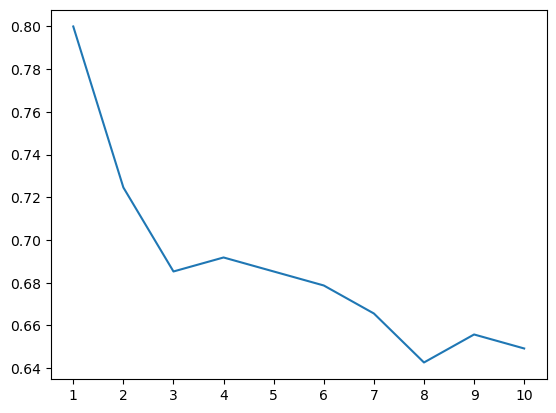

In [25]:
#Let's see accuracy with different neighbors number

a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a._append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

We can see that, the accuracy is highest for 1 neighbor which is 80% which deteriorates as the neighbour increases.

We saw that age, systolicBP, diastolicBP, and BS had quite higher correlation. Let's get a dataset of these features and run the test again.

In [26]:
sf=df[['Age','SystolicBP', 'DiastolicBP', 'BS','RiskLevel']] #selected features dataframe

In [27]:
# Spliting the dataset
train_p,test_p=train_test_split(sf,test_size=0.3,random_state=23)
train_x_p=train_p[['Age','SystolicBP', 'DiastolicBP', 'BS']]
train_y_p=train_p.RiskLevel
test_x_p=test_p[['Age','SystolicBP', 'DiastolicBP', 'BS']]
test_y_p=test_p.RiskLevel

The accuracy of the SVM is: 0.5606557377049181


<Axes: >

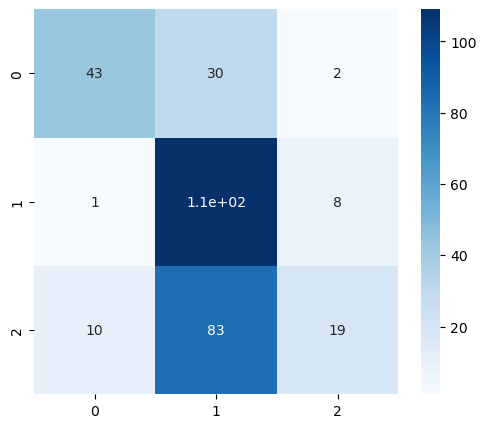

In [28]:
#SVM
model_p = svm.SVC() #select the algorithm
model_p.fit(train_x_p,train_y_p) # we train the algorithm with the training data and the training output
prediction_p=model_p.predict(test_x_p) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction_p,test_y_p))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

#we create a confusion matrics as well
confusion_matrix_svm_p=metrics.confusion_matrix(test_y_p,prediction_p)
confusion_matrix_svm_p

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_svm_p, annot=True, cmap="Blues")

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the Logistic Regression is 0.5770491803278689


<Axes: >

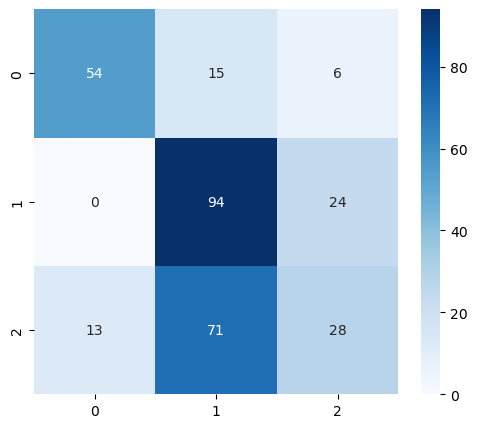

In [29]:
#Logistic Regression

model_p = LogisticRegression()
model_p.fit(train_x_p,train_y_p)
prediction_p=model_p.predict(test_x_p)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_p,test_y_p))

#confusion matrix
confusion_matrix_lr_p=metrics.confusion_matrix(test_y_p,prediction_p)
confusion_matrix_lr_p

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_lr_p, annot=True, cmap="Blues")

The accuracy of the Decision Tree is 0.8


<Axes: >

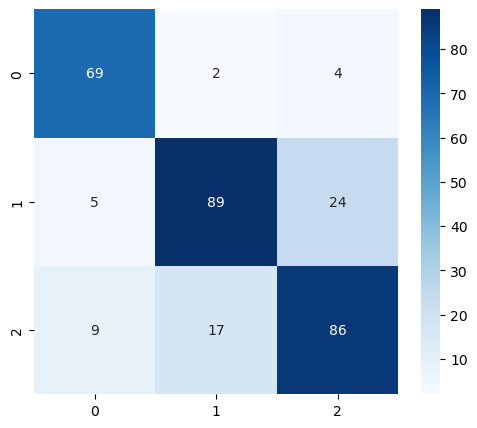

In [30]:
#Decision Tree

model_p=DecisionTreeClassifier()
model_p.fit(train_x_p,train_y_p)
prediction_p=model_p.predict(test_x_p)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction_p,test_y_p))

#Confusion matrix
confusion_matrix_dt_p=metrics.confusion_matrix(test_y_p,prediction_p)
confusion_matrix_dt_p

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_dt_p, annot=True, cmap="Blues")

The accuracy of the KNN is 0.6819672131147541


<Axes: >

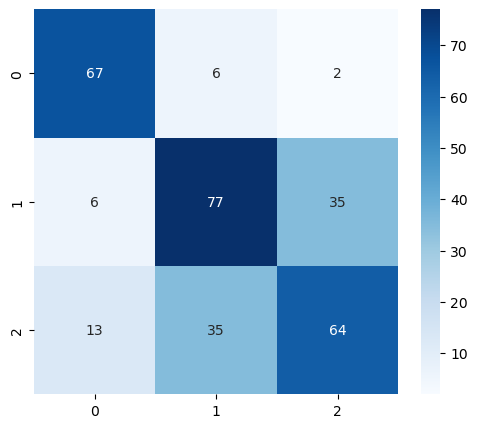

In [31]:
#KNN

model_p=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model_p.fit(train_x_p,train_y_p)
prediction_p=model_p.predict(test_x_p)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction_p,test_y_p))

#Confusion matrix
confusion_matrix_knn_p=metrics.confusion_matrix(test_y_p,prediction_p)
confusion_matrix_knn_p

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_knn_p, annot=True, cmap="Blues")

C:\Users\zahl\AppData\Local\Temp\ipykernel_6960\2522421681.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a_p=pd.Series()


([<matplotlib.axis.XTick at 0x24797d6c7c0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

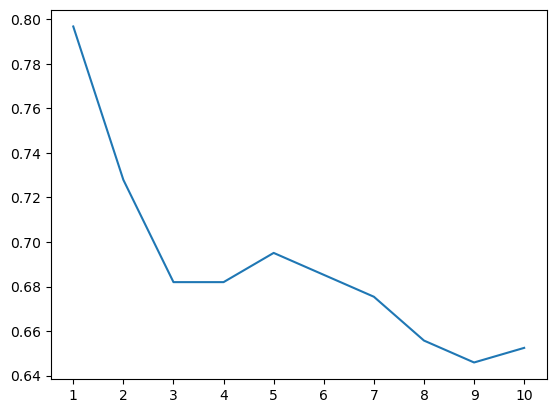

In [32]:
#Let's see accuracy with different neighbors number

a_index_p=list(range(1,11))
a_p=pd.Series()
x_p=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model_p=KNeighborsClassifier(n_neighbors=i) 
    model_p.fit(train_x_p,train_y_p)
    prediction_p=model_p.predict(test_x_p)
    a_p=a_p._append(pd.Series(metrics.accuracy_score(prediction_p,test_y_p)))
plt.plot(a_index_p, a_p)
plt.xticks(x_p)

We can see that the accuracy of Logistic Regression increased while the others decreased as we analysed the data with best of our knowledge.

Futhermore, we will now standardize the features value to see if the accuracy chnges.

In [33]:
sc = StandardScaler() # creating an instance of the class object
df_new = pd.DataFrame(sc.fit_transform(df), columns=df.columns)  #fit and transforming StandardScaler the dataframe

In [34]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [35]:
df_new.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,1.446956,-1.377512
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-0.532088,-1.377512
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,0.704815,-1.377512
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-0.532088,-1.377512
4,0.380777,0.369765,-1.186009,-0.797710,-0.485215,0.210054,-0.081782


Now, we don't want our target feature to be stardardized.

In [36]:
df_new["RiskLevel"] = df["RiskLevel"]

In [37]:
df_new.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,1.446956,0
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-0.532088,0
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,0.704815,0
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-0.532088,0
4,0.380777,0.369765,-1.186009,-0.797710,-0.485215,0.210054,1


In [38]:
train, test = train_test_split(df_new, test_size = 0.3, random_state=45)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(709, 7)
(305, 7)


In [39]:
train_A = train[['Age','SystolicBP','DiastolicBP','BS', 'BodyTemp', 'HeartRate']]# taking the training data features
train_b=train.RiskLevel# output of our training data
test_A= test[['Age','SystolicBP','DiastolicBP','BS', 'BodyTemp', 'HeartRate']] # taking test data features
test_b =test.RiskLevel   #output value of test data

The accuracy of the SVM is: 0.6918032786885245


<Axes: >

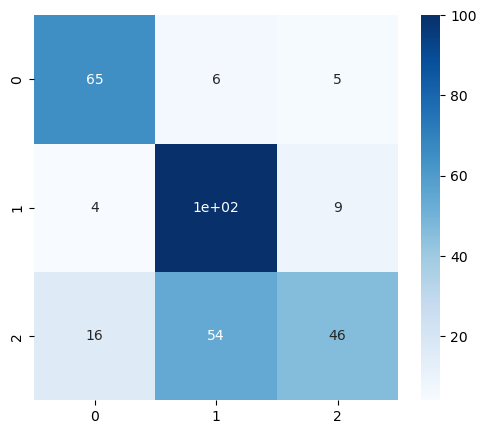

In [40]:
model = svm.SVC() #select the algorithm
model.fit(train_A,train_b) # we train the algorithm with the training data and the training output
prediction=model.predict(test_A) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_b))#now we check the accuracy of the algorithm.
#we pass the predicted output by the model and the actual output

#we create a confusion matrics as well
confusion_matrix_svm_s=metrics.confusion_matrix(test_b,prediction)
confusion_matrix_svm_s

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_svm_s, annot=True, cmap="Blues")

The accuracy of the Logistic Regression is 0.6360655737704918


<Axes: >

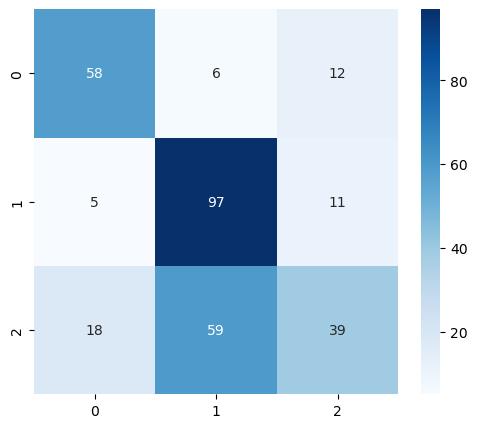

In [41]:
model = LogisticRegression()
model.fit(train_A,train_b)
prediction=model.predict(test_A)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_b))

#confusion matrix
confusion_matrix_lr_s=metrics.confusion_matrix(test_b,prediction)
confusion_matrix_lr_s

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_lr_s, annot=True, cmap="Blues")

The accuracy of the Decision Tree is 0.8360655737704918


<Axes: >

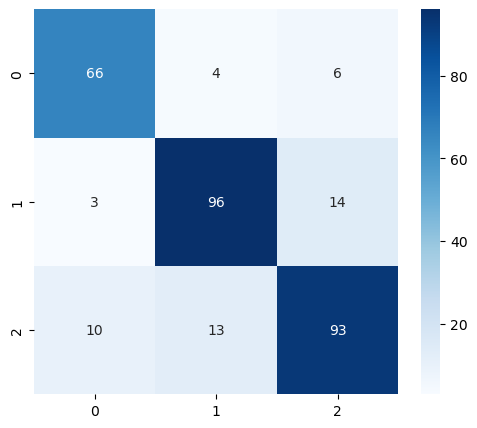

In [42]:
model=DecisionTreeClassifier()
model.fit(train_A,train_b)
prediction=model.predict(test_A)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_b))

#Confusion matrix
confusion_matrix_dt_s=metrics.confusion_matrix(test_b,prediction)
confusion_matrix_dt_s

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_dt_s, annot=True, cmap="Blues")

The accuracy of the KNN is 0.6983606557377049


<Axes: >

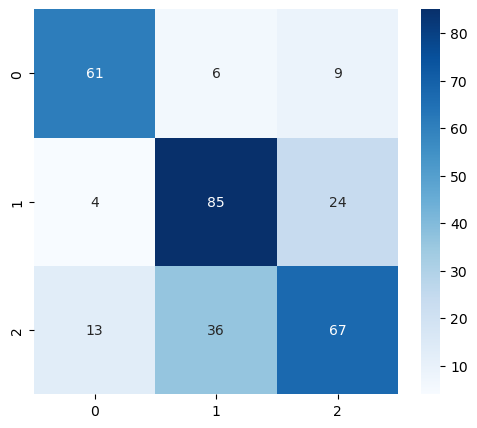

In [43]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_A,train_b)
prediction=model.predict(test_A)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_b))

#Confusion matrix
confusion_matrix_knn_s=metrics.confusion_matrix(test_b,prediction)
confusion_matrix_knn_s

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(132)
sns.heatmap(confusion_matrix_knn_s, annot=True, cmap="Blues")

C:\Users\zahl\AppData\Local\Temp\ipykernel_6960\525849698.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


([<matplotlib.axis.XTick at 0x24797f35bd0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

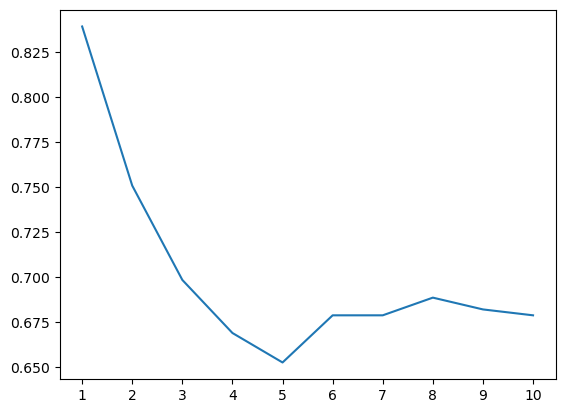

In [44]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_A,train_b)
    prediction=model.predict(test_A)
    a=a._append(pd.Series(metrics.accuracy_score(prediction,test_b)))
plt.plot(a_index, a)
plt.xticks(x)

We can see the accuracy of Logistic Regression increased by 7 points once the dataset was standardized. We can also see slight increment in the accuracy of other algorithms as well.